# Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Helper Functions

# Load Data

In [26]:
file_path = '../data/raw/'

In [27]:
df = pd.read_csv(file_path + 'churn.csv')
df = df.drop(['RowNumber'], axis = 1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## Data Dimension

In [28]:
print('Number of Rows: {} \nNumber of Columns: {}'.format(df.shape[0], df.shape[1]))

Number of Rows: 10000 
Number of Columns: 13


## Check NaN Values

In [29]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Check Data Types

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Descriptive Analysis

## Numerical Attributes

In [21]:
numerical_attributes = df.select_dtypes(include=['int64','float64'])

t_mean = pd.DataFrame(numerical_attributes.apply( np.mean )).T
t_median = pd.DataFrame(numerical_attributes.apply( np.median )).T
t_std = pd.DataFrame(numerical_attributes.apply( np.std )).T
t_min = pd.DataFrame(numerical_attributes.apply( np.min )).T
t_max = pd.DataFrame(numerical_attributes.apply( np.max )).T
t_skew = pd.DataFrame(numerical_attributes.apply( lambda x: x.skew() )).T
t_kurtosis = pd.DataFrame(numerical_attributes.apply( lambda x: x.kurtosis() )).T

num_metrics = pd.concat( [t_min,t_max,t_mean, t_median, t_std,t_skew,t_kurtosis]).T.reset_index()
num_metrics.columns = ['attributes','min','max','mean','median','std','skew','kurtosis']
num_metrics

,attributes,min,max,mean,median,std,skew,kurtosis
0,CustomerId,15565701.000,15815690.000,15690940.569,15690738.000,71932.589,0.001,-1.196
1,CreditScore,350.000,850.000,650.529,652.000,96.648,-0.072,-0.426
2,Age,18.000,92.000,38.922,37.000,10.487,1.011,1.395
3,Tenure,0.000,10.000,5.013,5.000,2.892,0.011,-1.165
4,Balance,0.000,250898.090,76485.889,97198.540,62394.285,-0.141,-1.489
5,NumOfProducts,1.000,4.000,1.530,1.000,0.582,0.746,0.583
6,HasCrCard,0.000,1.000,0.706,1.000,0.456,-0.902,-1.187
7,IsActiveMember,0.000,1.000,0.515,1.000,0.500,-0.060,-1.997
8,EstimatedSalary,11.580,199992.480,100090.240,100193.915,57507.617,0.002,-1.182
9,Exited,0.000,1.000,0.204,0.000,0.403,1.472,0.166


In [32]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']

for i, coluna in num_cols:
    pos_x, pos_y = divmod(i,2)
    print(pos_x, pos_y)

ValueError: too many values to unpack (expected 2)

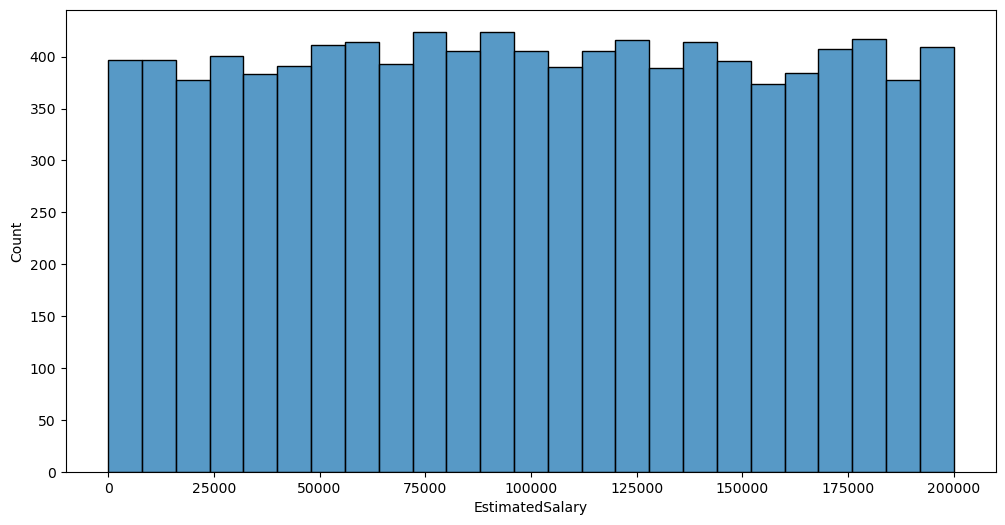

In [23]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
sns.histplot(data = df, x = 'EstimatedSalary', bins = 25, ax = axes);

## Categorical Attributes